In [58]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import re
from os import walk
import math
from mpl_toolkits.mplot3d import Axes3D

In [187]:
A = 0.8
x1_alt = []
x2_alt = []

x1_sim = []
x2_sim = []

x1_mom = []
x2_mom = []

def run(): 
    
    num_iter = 100
    
    gamma = 0.1
    
    reg = True

    eta1 = 0.5
    eta2 = 0.5
    
    x1 = 40.0
    x2 = 0.0

    x1_alt.append(x1)
    x2_alt.append(x2)

    x1_sim.append(x1)
    x2_sim.append(x2)
    
    x1_mom.append(x1)
    x2_mom.append(x2)

    #for i in range(1, num_iter):
    #    x1_alt.append(x1_alt[i-1] + eta1 * A * x2_alt[i-1])
    #    x2_alt.append(x2_alt[i-1] - eta2 * A * x1_alt[i])
    #    
    #    if reg:
    #        x1_sim.append(x1_sim[i-1] + eta1 * A * x2_sim[i-1] - gamma * x2_sim[i-1])
    #        x2_sim.append(x2_sim[i-1] - eta2 * A * x1_sim[i-1] + gamma * x1_sim[i-1])
    #    else:
    #        x1_sim.append(x1_sim[i-1] + eta1 * A * x2_sim[i-1])
    #        x2_sim.append(x2_sim[i-1] - eta2 * A * x1_sim[i-1])
            
        
    x1_mom.append(x1_mom[0] + eta1 * A * x2_mom[0])
    x2_mom.append(x2_mom[0] - eta2 * A * x1_mom[0])
    
    x1_alt.append(x1_mom[0] + eta1 * A * x2_mom[0])
    x2_alt.append(x2_mom[0] - eta2 * A * x1_mom[0])
    
    for i in range(2, num_iter):
        
        x1_alt.append(x1_alt[i-1] + eta1 * A * x2_alt[i-1] - eta1/2 * A * x2_alt[i-2])
        x2_alt.append(x2_alt[i-1] - eta2 * A * x1_alt[i] + eta2/2 * A * x1_alt[i-1])
        
        x1_mom.append(x1_mom[i-1] + eta1 * A * x2_mom[i-1] - (eta1 / 2) * A * x2_mom[i-2])
        x2_mom.append(x2_mom[i-1] - eta2 * A * x1_mom[i-1] + (eta2 / 2) * A * x1_mom[i-2])
        
        
def plot():
    
    circle1 = plt.Circle((0, 0), 40, fill=False, color='gray')
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
    ax.plot(x1_alt, x2_alt, 'r', label="AltGD")
    ax.add_artist(circle1)
    
    circle2 = plt.Circle((0, 0), 40, fill=False, color='gray')
    fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
    ax2.plot(x1_sim, x2_sim, 'b', label="SimGD")
    ax2.add_artist(circle2)
    
    circle3 = plt.Circle((0, 0), 40, fill=False, color='gray', clip_on=False)
    fig, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
    ax3.plot(x1_mom, x2_mom, 'g', label="NegMom")
    ax3.add_artist(circle3)
    



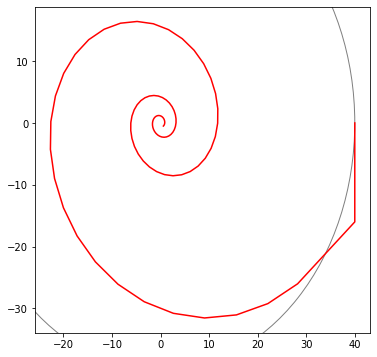

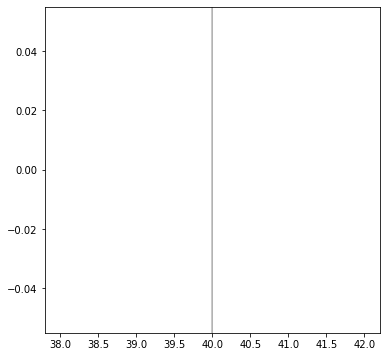

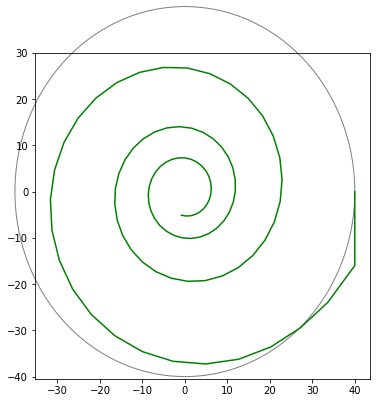

In [188]:
run()
plot()